# 🏆 Diabetes Risk Prediction — Premium ML Pipeline (Kaggle Playground S5E12)

Author: **Sajeeb Khan**  
Competition: *Playground Series — Season 5, Episode 12*

---

## 🎯 Objective  
Predict whether a patient has **diagnosed diabetes** using health, lifestyle, and biometric features.

## 🚀 What this Notebook Delivers  
✔ Clean & Professional EDA  
✔ Correlation Heatmaps  
✔ Automatic Preprocessing  
✔ Model Benchmarking (3 Models)  
✔ Best Model Auto-Selection  
✔ Feature Importance Visualization  
✔ Ready Submission File  

---

> ⭐ Designed for clarity, performance, and Kaggle competition standards.


# 📘 1. Libraries

We begin by importing all the required Python libraries used throughout this notebook.

These include:
- `pandas` for data handling  
- `numpy` for numerical operations  
- `seaborn` & `matplotlib` for visualization  
- `sklearn` models & preprocessing tools  

---


In [1]:
# 1. Libraries 📚

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

plt.style.use("seaborn-v0_8")
sns.set_palette("coolwarm")


# 📁 2. Dataset

We load the competition dataset files directly from the Kaggle environment.

---


In [2]:
# 2. Dataset 📊

train = pd.read_csv("/kaggle/input/playground-series-s5e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")

train.head()


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [31]:
target = "diagnosed_diabetes"

X = train.drop(columns=["id", target])
y = train[target]

test_data = test.drop(columns=["id"])


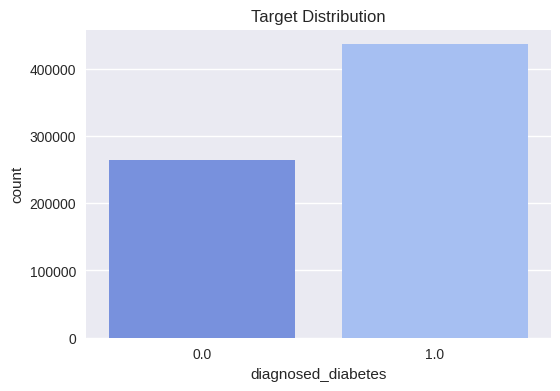

In [5]:
# Distribution of target
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()


In [35]:
train.shape,test.shape

((700000, 26), (300000, 25))

In [36]:
train.isnull().sum().sort_values(ascending=False).head()


id                         0
age                        0
cardiovascular_history     0
hypertension_history       0
family_history_diabetes    0
dtype: int64

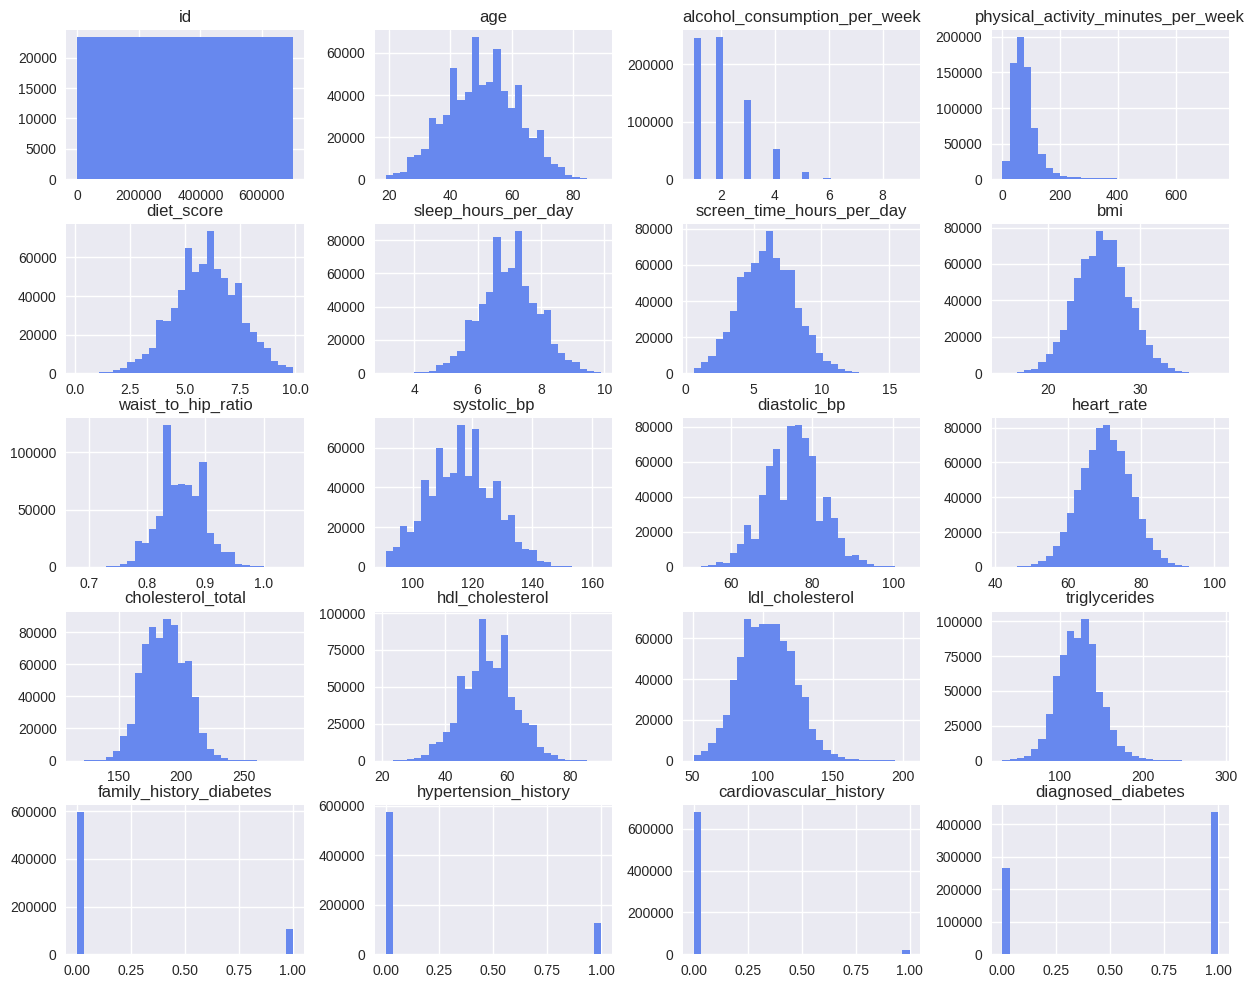

In [38]:
num_cols= train.select_dtypes(include=['int64', 'float64']).columns
train[num_cols].hist(figsize=(15,12), bins=30)
plt.show()

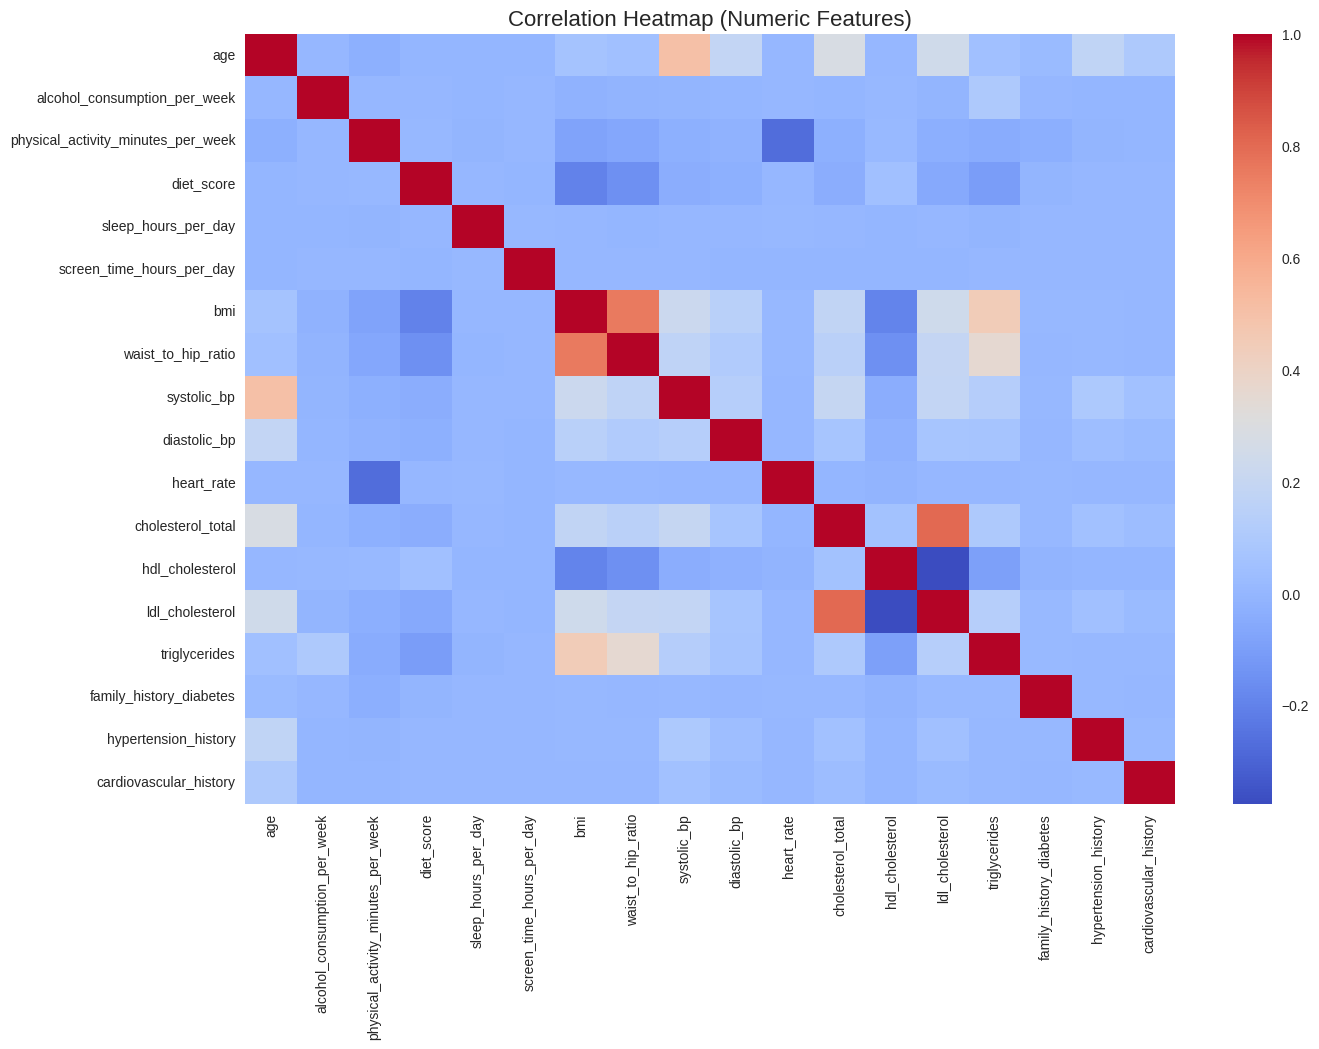

In [6]:
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15,10))
sns.heatmap(train[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=16)
plt.show()


In [10]:
# 4. Preprocessing 🛠️  (fixed version)

# 1) Separate features again (just to be safe)
X = train.drop(columns=["id", target])
y = train[target]
test_data = test.drop(columns=["id"])

# 2) Find categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

# 3) One-hot encode categoricals
X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)
test_enc = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)

# 4) Align train & test columns
X_enc, test_enc = X_enc.align(test_enc, join="left", axis=1, fill_value=0)

# 5) Scale (now everything is numeric)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_enc)
test_scaled = scaler.transform(test_enc)

# Save feature names for later (feature importance)
feature_names = X_enc.columns

X_scaled[:5]


Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']


array([[-1.66099390e+00, -1.02310918e+00, -6.88168366e-01,
         1.18653948e+00, -2.24191512e-01,  4.31436895e-02,
         2.63058315e+00,  1.87557690e+00, -3.90013062e-01,
        -7.97115095e-01, -1.17712658e+00,  7.28069434e-01,
         5.05264119e-01,  5.83214757e-01, -8.52157601e-01,
        -4.19097481e-01, -4.71676735e-01, -1.76840621e-01,
        -9.52784765e-01, -7.26776379e-02, -4.23141398e-01,
         2.09410558e+00, -1.59855786e-01, -1.10922772e+00,
         1.01687086e+00, -1.47701613e-01, -3.58302539e-01,
        -3.73763933e-01,  1.70880993e+00, -8.42401140e-01,
        -4.72679015e-01, -4.13447265e-01, -1.55095593e+00,
        -4.45069079e-01, -1.63880150e-01, -2.76713377e-01],
       [-3.08638768e-02, -6.90824392e-02, -1.41240318e-01,
        -1.80201139e-01, -5.56820338e-01, -1.05172476e-01,
        -7.25235782e-01, -7.57398775e-01,  3.36573890e-01,
         2.28410234e-01,  1.19943124e-01,  7.28069434e-01,
        -4.62492723e-01,  9.51201928e-01,  3.71128957e-

In [40]:
results_df = (
    pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
    .sort_values("Accuracy", ascending=False)
    .reset_index(drop=True)
)

results_df


,Model,Accuracy
0,Gradient Boosting,0.667821
1,Random Forest (100 trees),0.662771
2,Logistic Regression,0.661700


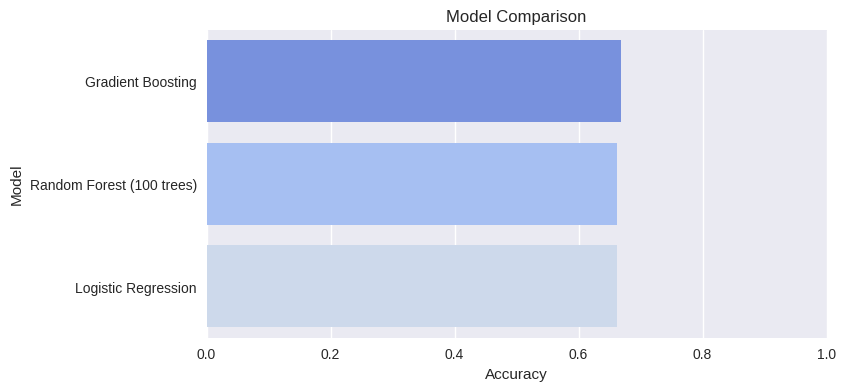

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Accuracy", y="Model")
plt.title("Model Comparison")
plt.xlim(0, 1)
plt.show()


In [11]:
# 5. ML Modeling ⚙️

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Random Forest (100 trees)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

models


{'Logistic Regression': LogisticRegression(max_iter=300),
 'Random Forest (100 trees)': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [21]:
!pip install catboost lightgbm xgboost --quiet


In [22]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [12]:
# 6. Training & Evaluation 🔥

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

results = {}

print("🔍 Evaluating Models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)

    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}\n")

results


🔍 Evaluating Models...

Training Logistic Regression...
Logistic Regression Accuracy: 0.6617

Training Random Forest (100 trees)...
Random Forest (100 trees) Accuracy: 0.6628

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.6678



{'Logistic Regression': 0.6617,
 'Random Forest (100 trees)': 0.6627714285714286,
 'Gradient Boosting': 0.6678214285714286}

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [26]:
# CatBoost
cat_model = CatBoostClassifier(
    iterations=400,
    learning_rate=0.05,
    depth=8,
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train)

# LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 348936, number of negative: 211064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623100 -> initscore=0.502727
[LightGBM] [Info] Start training from score 0.502727


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [27]:
models = {
    "CatBoost": cat_model,
    "LightGBM": lgbm_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    print(f"{name} Accuracy: {acc:.4f}")


CatBoost Accuracy: 0.6793
LightGBM Accuracy: 0.6829
XGBoost Accuracy: 0.6839


In [28]:
estimators = [
    ("cat", cat_model),
    ("lgbm", lgbm_model),
    ("xgb", xgb_model)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=200),
    passthrough=True
)

stack_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 348936, number of negative: 211064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623100 -> initscore=0.502727
[LightGBM] [Info] Start training from score 0.502727
[LightGBM] [Info] Number of positive: 279148, number of negative: 168852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 448000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623098 -> initscore=0.502720

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x782ca7b773d0>),
                               ('lgbm',
                                LGBMClassifier(colsample_bytree=0.8,
                                               learning_rate=0.05,
                                               n_estimators=400,
                                               random_state=42,
                                               subsample=0.8)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=400, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(max_iter=200),
                   passthrough=True)

In [29]:
stack_preds = stack_model.predict(X_valid)
stack_acc = accuracy_score(y_valid, stack_preds)
stack_acc


0.6842214285714285

In [13]:
# 7. Best Model Selection ⭐

best_model_name = max(results, key=results.get)
best_model_name


'Gradient Boosting'

In [14]:
best_model = models[best_model_name]
best_model.fit(X_scaled, y)

best_model


GradientBoostingClassifier(random_state=42)

In [16]:
!pip install lightgbm --quiet
from lightgbm import LGBMClassifier

# Train LightGBM (best for tabular competitions)
best_model = LGBMClassifier(
    n_estimators=900,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',  # VERY IMPORTANT
    random_state=42
)

best_model.fit(X_scaled, y)
best_model


[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1676
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.03, n_estimators=900, random_state=42,
               subsample=0.8)

In [30]:
final_model = stack_model
final_model.fit(X_scaled, y)

test_predictions = final_model.predict(test_scaled)

submission = pd.DataFrame({
    "id": test["id"],
    "diagnosed_diabetes": test_predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()


[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1676
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503561
[LightGBM] [Info] Start training from score 0.503561
[LightGBM] [Info] Number of positive: 349045, number of negative: 210955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.224024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1675
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623295 -> initscore=0.503556

,id,diagnosed_diabetes
0,700000,0.0
1,700001,1.0
2,700002,1.0
3,700003,0.0
4,700004,1.0


In [32]:
pd.Series(test_predictions).value_counts()


1.0    203899
0.0     96101
Name: count, dtype: int64